# Lab Status Bar
### Using plotting techniques to visualize progress in the lab

Import necessary packages

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline

### Project Status Bar###
I use spreadsheets to keep up with my data; this is a nifty way to visualize my progress. Lab work progresses in this order: 'extract', 'pcr', 'plate', 'done'.

Import data

In [5]:
# import data
df = pd.read_csv('status_test.csv')
df.head()

,master_label,Locality,Depth,Status
0,CR17-0052,Mound 12,999,done
1,CR17-0053,Mound 12,999,done
2,CR17-0054,Mound 12,999,done
3,CR17-0055,Mound 12,999,done
4,CR17-0056,Mound 12,999,done


**Plot "Status" of samples, grouped by locality** (easy way to check how much is done or left to go)

In [3]:
nsme_0123 = {'extract': 0, 'pcr': 1, 'plate': 2, 'done': 3}
df['Status_no'] = df['Status'].map(nsme_0123)
df2 = df.sort_values('Status_no')

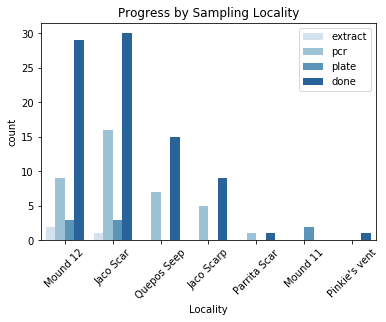

In [6]:
sns.countplot(data=df2, x="Locality", hue="Status", orient="v", palette="Blues")
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.title('Progress by Sampling Locality');

As can be seen above, as processing of samples is completed in the lab, they get shifted over to the darker blue status bars. This rendering groups samples by locality so it's easy to see which localities require further processing and which localities are under-sampled in general.

**Plot "Status" of samples, grouped by depth**

In [8]:
df2['Rel_depth'] = pd.cut(df2['Depth'], [900, 1500, 1800, 3000], labels=['Shallow', 'Mid', 'Deep'])

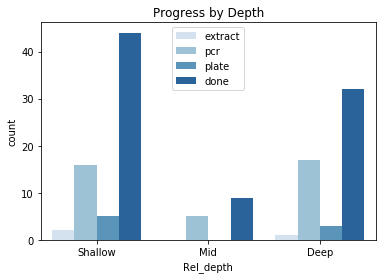

In [10]:
sns.countplot(data=df2, x="Rel_depth", hue="Status", orient="v", palette="Blues")
plt.legend(loc='upper center')
plt.title('Progress by Depth');

Same color rendering as locality plot. This rendering groups samples by depth so it's easy to see which depths require further processing and which depths are under-sampled in general.